In [66]:
# This cell is handling all the importing of libraries and tools
# imports tensorflow and tf.keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.6.0
Keras Version: 2.6.0


In [67]:
# import NIST data base for hand written digits
# Print the shapes of data as loaded 
# then reshape to the data to flatten from 2 dimension (28,28) to 1 dimension (28*28)
# 
# X_train - array of gray scale image data with shapes containing traning data
# y_train - array of digit labels with shape for training data
# x_test - greyscale image data, test data
# y_test - digit labels, for test data

from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


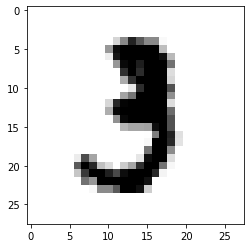

In [68]:
# remapping/reshaping back to 2 dimension and plotting first data point
# to visualize the data point

# changed to observer different digit

plt.imshow(Xtrain[10].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


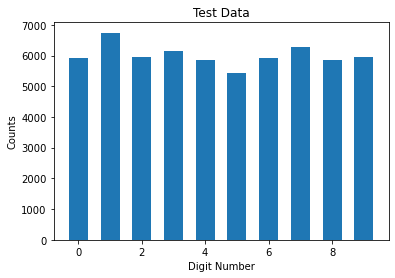

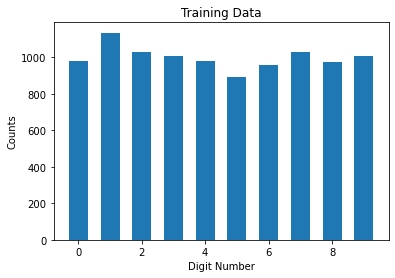

In [69]:
# Get distribution of data labels and plot in bar chart
digit_train, counts_train = np.unique(ytrain, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.title('Test Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# display histogram for test data
digit_test, counts_test = np.unique(ytest, return_counts = True)
distribution_test = dict(zip(digit_test , counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.title('Training Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()


In [70]:
# splitting the training data into train and test subsets
# test size set to 1/12 proportion of the training data set

# split into 50,000 train to 10,000 test

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(50000, 784) (10000, 784)
[8 5 1 ... 0 0 4] [7 3 8 ... 9 8 1]


In [71]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)

# import stochastic gradient descent for weight optimization
# Sequential model for a plain stack of layers 
# Creates a neural network with 3 layers, 2 hidden layers with relu activation functions
# 1 output layer with softwmax
#
# Then we optimize for weights using learning rate of 0.001
# then build model using model.compile()

# change 2 hidden layers to sigmoid activations, 1 layer to relu
# last output layer is softmax


from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="sigmoid"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [72]:
# training the model using model.fit()

# change batch size to 128
# change epoch to 15

model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data =(X_val,y_val))


Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 2.3045 - accuracy: 0.1061 - val_loss: 2.2974 - val_accuracy: 0.1116
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 2.2948 - accuracy: 0.1132 - val_loss: 2.2939 - val_accuracy: 0.1167
Epoch 3/15
391/391 [==============================] - 1s 4ms/step - loss: 2.2917 - accuracy: 0.1145 - val_loss: 2.2907 - val_accuracy: 0.1105
Epoch 4/15
391/391 [==============================] - 1s 4ms/step - loss: 2.2884 - accuracy: 0.1177 - val_loss: 2.2875 - val_accuracy: 0.1136
Epoch 5/15
391/391 [==============================] - 1s 4ms/step - loss: 2.2851 - accuracy: 0.1240 - val_loss: 2.2844 - val_accuracy: 0.1093
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 2.2819 - accuracy: 0.1153 - val_loss: 2.2810 - val_accuracy: 0.1189
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 2.2786 - accuracy: 0.1294 - val_loss: 2.2777 - val_accuracy: 0.1093
Epoch 

In [73]:
# print a summary of our model and each layer

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_21 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


In [74]:
# evaluate model on test data

X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     
# Comments
# The accuracy of the model decreased significantly, compared to 93% 
# before modifying the model. This may be due to decreasing the training data
# and increasing the test data. Additionally, the batch size is larger, so optimization
# of weights is taking larger steps and not able to get closer to optimal weights

Accuracy: 0.298


In [75]:
# generate confusion matrix and classification report
# report shows scores for precision, recall, F1, and support scores of the model

from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

# Comments
# From the confusion matrix, there is a lot more misclassification by the prediction
# Notably, the model incorrectly predicted a lot of the test values as '1'

Confusion Matrix
[[ 554    0    4    0    0    5    1    1    4    7]
 [ 340 1135  927  627  903  683  350  789  854  959]
 [   1    0   45    0    1    0    0    0    2    0]
 [  25    0   25  379    0  187    0    1   90    4]
 [   0    0    0    0    4    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [  55    0   27    3   31   11  607    1    7    1]
 [   0    0    4    1    0    2    0  210    2    1]
 [   0    0    0    0    0    0    0    0   10    0]
 [   5    0    0    0   43    4    0   26    5   36]]
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.96      0.71       576
           1       1.00      0.15      0.26      7567
           2       0.04      0.92      0.08        49
           3       0.38      0.53      0.44       711
           4       0.00      0.80      0.01         5
           5       0.00      0.00      0.00         0
           6       0.63      0.82      0.71       7

E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\tickn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
